| Feature | Description |
|---------|:-----------:|
|'airconditioningtypeid' |	 Type of cooling system present in the home (if any) |
|'architecturalstyletypeid' |	 Architectural style of the home (i.e. ranch, colonial, split-level, etc…) |
|'basementsqft' |	 Finished living area below or partially below ground level |
|'bathroomcnt' |	 Number of bathrooms in home including fractional bathrooms |
|'bedroomcnt' |	 Number of bedrooms in home  |
|'buildingqualitytypeid' |	 Overall assessment of condition of the building from best (lowest) to worst (highest) |
|'buildingclasstypeid' |	The building framing type (steel frame, wood frame, concrete/brick)  |
|'calculatedbathnbr' |	 Number of bathrooms in home including fractional bathroom |
|'decktypeid' |	Type of deck (if any) present on parcel |
|'threequarterbathnbr' |	 Number of 3/4 bathrooms in house (shower + sink + toilet) |
|'finishedfloor1squarefeet' |	 Size of the finished living area on the first (entry) floor of the home |
|'calculatedfinishedsquarefeet' |	 Calculated total finished living area of the home  |
|'finishedsquarefeet6' |	Base unfinished and finished area |
|'finishedsquarefeet12' |	Finished living area |
|'finishedsquarefeet13' |	Perimeter  living area |
|'finishedsquarefeet15' |	Total area |
|'finishedsquarefeet50' |	 Size of the finished living area on the first (entry) floor of the home |
|'fips' |	 Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details |
|'fireplacecnt' |	 Number of fireplaces in a home (if any) |
|'fireplaceflag' |	 Is a fireplace present in this home  |
|'fullbathcnt' |	 Number of full bathrooms (sink, shower + bathtub, and toilet) present in home |
|'garagecarcnt' |	 Total number of garages on the lot including an attached garage |
|'garagetotalsqft' |	 Total number of square feet of all garages on lot including an attached garage |
|'hashottuborspa' |	 Does the home have a hot tub or spa |
|'heatingorsystemtypeid' |	 Type of home heating system |
|'latitude' |	 Latitude of the middle of the parcel multiplied by 10e6 |
|'longitude' |	 Longitude of the middle of the parcel multiplied by 10e6 |
|'lotsizesquarefeet' |	 Area of the lot in square feet |
|'numberofstories' |	 Number of stories or levels the home has |
|'parcelid' |	 Unique identifier for parcels (lots)  |
|'poolcnt' |	 Number of pools on the lot (if any) |
|'poolsizesum' |	 Total square footage of all pools on property |
|'pooltypeid10' |	 Spa or Hot Tub |
|'pooltypeid2' |	 Pool with Spa/Hot Tub |
|'pooltypeid7' |	 Pool without hot tub |
|'propertycountylandusecode' |	 County land use code i.e. it's zoning at the county level |
|'propertylandusetypeid' |	 Type of land use the property is zoned for |
|'propertyzoningdesc' |	 Description of the allowed land uses (zoning) for that property |
|'rawcensustractandblock' |	 Census tract and block ID combined - also contains blockgroup assignment by extension |
|'censustractandblock' |	 Census tract and block ID combined - also contains blockgroup assignment by extension |
|'regionidcounty' |	County in which the property is located |
|'regionidcity' |	 City in which the property is located (if any) |
|'regionidzip' |	 Zip code in which the property is located |
|'regionidneighborhood' |	Neighborhood in which the property is located |
|'roomcnt' |	 Total number of rooms in the principal residence |
|'storytypeid' |	 Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details. |
|'typeconstructiontypeid' |	 What type of construction material was used to construct the home |
|'unitcnt' |	 Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...) |
|'yardbuildingsqft17' |	Patio in  yard |
|'yardbuildingsqft26' |	Storage shed/building in yard |
|'yearbuilt' |	 The Year the principal residence was built  |
|'taxvaluedollarcnt' |	The total tax assessed value of the parcel |
|'structuretaxvaluedollarcnt' |	The assessed value of the built structure on the parcel |
|'landtaxvaluedollarcnt' |	The assessed value of the land area of the parcel |
|'taxamount' |	The total property tax assessed for that assessment year |
|'assessmentyear' |	The year of the property tax assessment  |
|'taxdelinquencyflag' |	Property taxes for this parcel are past due as of 2015 |
|'taxdelinquencyyear' |	Year for which the unpaid propert taxes were due  |
| | |

In [1]:
import pandas as pd
import gc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
data_y = pd.DataFrame.from_csv('data/train_2016.csv', parse_dates=['transactiondate'], index_col=None)

In [3]:
data_y['month'] = data_y.transactiondate.dt.month
data_y.head()

,parcelid,logerror,transactiondate,month
0,11016594,0.0276,2016-01-01,1
1,14366692,-0.1684,2016-01-01,1
2,12098116,-0.0040,2016-01-01,1
3,12643413,0.0218,2016-01-02,1
4,14432541,-0.0050,2016-01-02,1


In [4]:
stds = list()
for m in data_y.month.unique():
    print(m)
    stds.append(data_y[data_y.month == m].logerror.std())
    print(len(data_y[data_y.month == m]))
    print(stds[-1])

1
6574
0.17186747282145437
2
6401
0.20139303588487162
3
8752
0.17724585715969499
4
9407
0.16908427627859904
5
10056
0.15342949275641432
6
10968
0.152878752497439
7
9984
0.15296906636103955
8
10510
0.16525205257429262
9
9597
0.15082358700633736
10
4991
0.13532500937115619
11
1829
0.1395908000308042
12
1742
0.1906884718955433


<IPython.core.display.Javascript object>


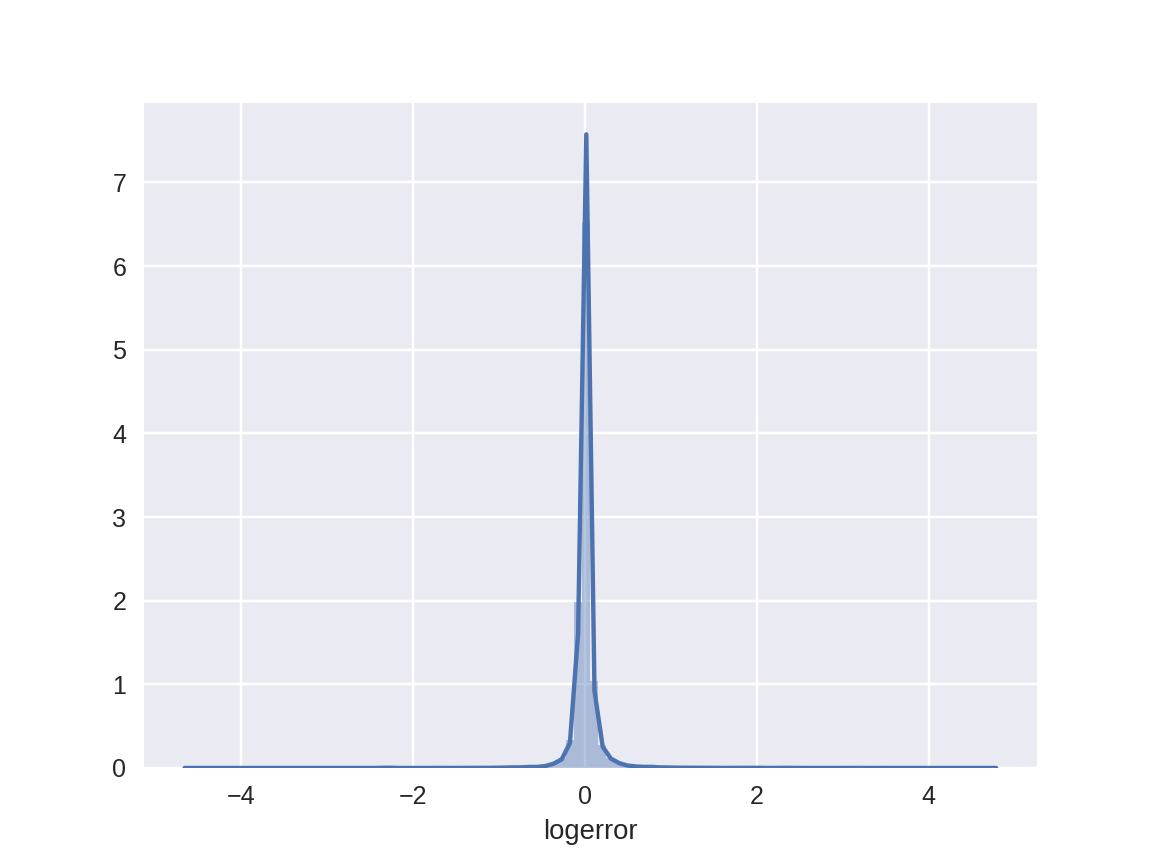

In [5]:
sns.distplot(data_y.logerror, bins=100)

In [6]:
data_X = pd.read_csv(
    'data/properties_2016.csv',
    index_col=None,
    dtype={
        'hashottuborspa': np.bool,
        'propertycountylandusecode': np.str,
        'propertyzoningdesc': np.str,
        'fireplaceflag': np.bool,
        'taxdelinquencyflag': np.str}
)

In [7]:
print(data_X['taxdelinquencyflag'].unique())
data_X['taxdelinquencyflag'] = data_X['taxdelinquencyflag'].map({'Y': True})

[nan 'Y']


In [8]:
for c, dtype in zip(data_X.columns, data_X.dtypes):	
    if dtype == np.float64:
        data_X[c] = data_X[c].astype(np.float32)

In [9]:
merged_data = data_y.merge(data_X, on='parcelid')

In [10]:
pd.isnull(merged_data).sum() > 0

parcelid                        False
logerror                        False
transactiondate                 False
month                           False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                      True
bedroomcnt                       True
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsys

In [11]:
merged_data['basementsqft'].unique()

array([   nan,   814.,   330.,   168.,   671.,  1555.,  1528.,   771.,
         700.,   831.,  1048.,  1312.,   690.,   564.,   198.,   676.,
         184.,   540.,   260.,   557.,   312.,   913.,  1350.,   802.,
         162.,   616.,  1551.,   485.,   238.,   493.,   760.,   515.,
         196.,   585.,   234.,   510.,   579.,   100.,   608.,  1210.])

In [12]:
print(merged_data['hashottuborspa'].unique())
print(merged_data['fireplaceflag'].unique())
print(merged_data['taxdelinquencyflag'].unique())
for f in ['hashottuborspa', 'fireplaceflag', 'taxdelinquencyflag']:
    merged_data[f] = merged_data[f].astype(np.bool)

[nan True]
[nan True]
[nan True]


In [13]:
from xgboost.sklearn import XGBRegressor

hyper_params = {
    'learning_rate': 0.1,
    'max_depth': 4,
    'n_jobs': 2,
    'objective': 'reg:linear',
    #'reg_alpha': 1.7,
    #'reg_lambda': 1,
    # 'gamma': 0.01,
    'min_child_weight': 5,

}
clf=None
clf = XGBRegressor(**hyper_params)

/usr/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-06-03 15:46:43.450082. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
# 0.070707 val score mit max_depth=4, min_child_weight=5, learning_rate=0.1
clf.fit(
    X=train_X.values,
    y=train_y.values,
    early_stopping_rounds=10,
    eval_set=[(train_X.values, train_y.values), (test_X.values, test_y.values)],
    verbose=True,
    eval_metric='mae'
)

NameError: name 'train_X' is not defined

/usr/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-06-03 15:46:45.095225. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Procedure based on https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# At first find out how many trees are needed by early stopping

In [15]:
import xgboost as xgb

xgb1 = XGBRegressor(
    learning_rate =0.1,
    n_estimators=20000,
    max_depth=4,
    objective='reg:linear',
    nthread=2,
    seed=27
)


xgtrain = xgb.DMatrix(
     merged_data.drop(
        ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode', 'month'],
        axis=1
    ).values,
    label=merged_data['logerror'].values,
)

cvresult = xgb.cv(
    xgb1.get_xgb_params(),
    xgtrain,
    num_boost_round=xgb1.get_params()['n_estimators'],
    nfold=10,
    metrics='mae',
    early_stopping_rounds=50,
    verbose_eval=False
)

/usr/lib/python3.6/site-packages/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/lib/python3.6/site-packages/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


In [16]:
n_trees = len(cvresult)
print(n_trees)
cvresult.tail()

65


,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
60,0.069366,0.001279,0.068328,0.000146
61,0.069361,0.001278,0.068310,0.000147
62,0.069359,0.001277,0.068296,0.000146
63,0.069358,0.001273,0.068282,0.000147
64,0.069358,0.001273,0.068271,0.000150


# Then fix the number of trees and perform a grid search with cross validation to find optimal hyper parameters

In [18]:
from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.model_selection import GridSearchCV


X = merged_data.drop(
    ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode', 'month'],
    axis=1).values

y = merged_data['logerror'].values

param_dist = {
    'learning_rate': [0.1],
    'n_estimators' : [n_trees],
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,6,2),
    'objective': ['reg:linear']
}
gsearch1 = GridSearchCV(
    estimator = XGBRegressor( 
        learning_rate =0.1,
        n_estimators=n_trees,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=2,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_dist,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=1,
    iid=False,
    cv=10
)

gsearch1.fit(X, y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.06925, std: 0.00357, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06929, std: 0.00353, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06923, std: 0.00354, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06950, std: 0.00358, params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06948, std: 0.00357, params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06939, std: 0.00357, params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06981, std: 0.00354, params: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1

In [19]:
max_depth = gsearch1.best_params_['max_depth']
print(max_depth)
min_child_weight = gsearch1.best_params_['min_child_weight']
print(min_child_weight)

3
5


In [20]:
param_test2 = {
    'max_depth':[max_depth-1, max_depth, max_depth+1],
    'min_child_weight':[min_child_weight-1, min_child_weight, min_child_weight+1],
    'learning_rate': [0.1],
    'n_estimators' : [n_trees],
    'objective': ['reg:linear']
}

gsearch2 = GridSearchCV(
    estimator = XGBRegressor( 
        learning_rate =0.1,
        n_estimators=n_trees,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=2,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test2,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=1,
    iid=False,
    cv=10
)

gsearch2.fit(X, y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.06916, std: 0.00354, params: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06913, std: 0.00356, params: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06913, std: 0.00356, params: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06924, std: 0.00354, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06923, std: 0.00354, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06922, std: 0.00353, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06932, std: 0.00354, params: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 4

In [21]:
max_depth = gsearch2.best_params_['max_depth']
print(max_depth)
min_child_weight = gsearch2.best_params_['min_child_weight']
print(min_child_weight)

2
6


In [22]:
param_test2b = {
    'max_depth':[1, 2],
    'min_child_weight':[5, 6, 7],
    'learning_rate': [0.1],
    'n_estimators' : [n_trees],
    'objective': ['reg:linear']
}

gsearch2b = GridSearchCV(
    estimator = XGBRegressor( 
        learning_rate =0.1,
        n_estimators=n_trees,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=2,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test2b,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=1,
    iid=False,
    cv=10
)

gsearch2b.fit(X, y)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.06919, std: 0.00362, params: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06918, std: 0.00362, params: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06918, std: 0.00363, params: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 7, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06913, std: 0.00356, params: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06913, std: 0.00356, params: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'n_estimators': 65, 'objective': 'reg:linear'},
  mean: -0.06915, std: 0.00356, params: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 7, 'n_estimators': 65, 'objective': 'reg:linear'}],
 {'learning_rate': 0.1,
  'max_depth': 2,
  'min_child_weight': 6,
  'n_estimators': 65,
  'objecti

In [23]:
max_depth = gsearch2b.best_params_['max_depth']
print(max_depth)
min_child_weight = gsearch2b.best_params_['min_child_weight']
print(min_child_weight)

2
6


In [24]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(
    estimator = XGBRegressor( 
        learning_rate =0.1,
        n_estimators=n_trees,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=2,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test3,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=1,
    iid=False,
    cv=10
)

gsearch3.fit(X, y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.06913, std: 0.00356, params: {'gamma': 0.0},
  mean: -0.06913, std: 0.00356, params: {'gamma': 0.1},
  mean: -0.06913, std: 0.00356, params: {'gamma': 0.2},
  mean: -0.06913, std: 0.00356, params: {'gamma': 0.3},
  mean: -0.06913, std: 0.00356, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 -0.069125067031018075)

In [25]:
gamma = gsearch3.best_params_['gamma']
print(gamma)

0.0


In [26]:
xgb2 = XGBRegressor(
    learning_rate =0.1,
    n_estimators=20000,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    gamma=gamma,
    objective='reg:linear',
    nthread=2,
    seed=27
)


cvresult = xgb.cv(
    xgb2.get_xgb_params(),
    xgtrain,
    num_boost_round=xgb2.get_params()['n_estimators'],
    nfold=10,
    metrics='mae',
    early_stopping_rounds=50,
    verbose_eval=False
)

In [27]:
n_trees = len(cvresult)
print(n_trees)
cvresult.tail()

81


,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
76,0.069100,0.001269,0.068800,0.000157
77,0.069100,0.001270,0.068796,0.000156
78,0.069102,0.001268,0.068794,0.000157
79,0.069100,0.001269,0.068791,0.000156
80,0.069098,0.001267,0.068789,0.000155


In [28]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(
    estimator = XGBRegressor( 
        learning_rate =0.1,
        n_estimators=n_trees,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=2,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test4,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=1,
    iid=False,
    cv=10
)

gsearch4.fit(X, y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.06918, std: 0.00359, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: -0.06917, std: 0.00359, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: -0.06913, std: 0.00360, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: -0.06913, std: 0.00358, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: -0.06918, std: 0.00357, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -0.06915, std: 0.00361, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -0.06913, std: 0.00358, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -0.06914, std: 0.00357, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: -0.06916, std: 0.00356, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: -0.06915, std: 0.00358, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -0.06910, std: 0.00356, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: -0.06912, std: 0.00357, params: {'colsample_bytree': 0.8,

In [29]:
subsample = gsearch4.best_params_['subsample']
print(subsample)
colsample_bytree = gsearch4.best_params_['colsample_bytree']
print(colsample_bytree)
colsample_bytree_times_hundred = int(colsample_bytree*100)
subsample_times_hundred = int(subsample*100)
print(colsample_bytree_times_hundred)
print(subsample_times_hundred)

0.8
0.8
80
80


In [32]:
param_test5 = {
 'subsample':[i/100.0 for i in range(subsample_times_hundred-5,subsample_times_hundred+10,5)],
 'colsample_bytree':[i/100.0 for i in range(colsample_bytree_times_hundred-5,colsample_bytree_times_hundred+10,5)]
}

gsearch5 = GridSearchCV(
    estimator = XGBRegressor( 
        learning_rate =0.1,
        n_estimators=n_trees,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=2,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test5,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=1,
    iid=False,
    cv=10
)

gsearch5.fit(X, y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.06914, std: 0.00357, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: -0.06910, std: 0.00356, params: {'colsample_bytree': 0.75, 'subsample': 0.8},
  mean: -0.06914, std: 0.00358, params: {'colsample_bytree': 0.75, 'subsample': 0.85},
  mean: -0.06915, std: 0.00358, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: -0.06910, std: 0.00356, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: -0.06913, std: 0.00358, params: {'colsample_bytree': 0.8, 'subsample': 0.85},
  mean: -0.06915, std: 0.00358, params: {'colsample_bytree': 0.85, 'subsample': 0.75},
  mean: -0.06912, std: 0.00354, params: {'colsample_bytree': 0.85, 'subsample': 0.8},
  mean: -0.06913, std: 0.00356, params: {'colsample_bytree': 0.85, 'subsample': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.8},
 -0.069100116040214155)

In [33]:
subsample = gsearch5.best_params_['subsample']
print(subsample)
colsample_bytree = gsearch5.best_params_['colsample_bytree']
print(colsample_bytree)

0.8
0.8


In [34]:
param_test6 = {
 'reg_alpha':[0, 1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(
    estimator = XGBRegressor( 
        learning_rate =0.1,
        n_estimators=n_trees,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective= 'reg:linear',
        nthread=2,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test6,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    n_jobs=1,
    iid=False,
    cv=10
)

gsearch6.fit(X, y)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.06910, std: 0.00356, params: {'reg_alpha': 0},
  mean: -0.06910, std: 0.00356, params: {'reg_alpha': 1e-05},
  mean: -0.06910, std: 0.00356, params: {'reg_alpha': 0.01},
  mean: -0.06911, std: 0.00355, params: {'reg_alpha': 0.1},
  mean: -0.06911, std: 0.00356, params: {'reg_alpha': 1},
  mean: -0.06919, std: 0.00367, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 -0.069100115727457875)

In [35]:
reg_alpha = gsearch6.best_params_['reg_alpha']
print(reg_alpha)

1e-05


In [68]:
# from https://www.kaggle.com/raviannaswamy/simple-lightgbm-starter-lb-0-06487
#params = dict()
#params['max_bin'] = 10
#params['learning_rate'] = 0.0021 # shrinkage_rate
#params['boosting_type'] = 'gbdt'
#params['objective'] = 'regression'
#params['metric'] = 'l2'          # or 'mae'
#params['sub_feature'] = 0.5      # feature_fraction 
#params['bagging_fraction'] = 0.85 # sub_row
#params['bagging_freq'] = 40
#params['num_leaves'] = 512        # num_leaf
#params['min_data'] = 400         # min_data_in_leaf
#params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf


# 0.069088: 
#xgb3 = XGBRegressor(
#    learning_rate =0.0021,
#    n_estimators=20000,
#    max_depth=max_depth,
#    min_child_weight=min_child_weight,
#    gamma=gamma,
#    subsample=subsample,
#    colsample_bytree=colsample_bytree,
#    objective='reg:linear',
#    nthread=2,
#    seed=27
#)

xgb3 = XGBRegressor(base_score=0.0, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0., learning_rate=0.0021,
       max_delta_step=0, max_depth=3, min_child_weight=6, missing=None,
       n_estimators=80000, nthread=3, objective='reg:linear',
       random_state=0, reg_alpha=1.7, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=1, subsample=0.95)


cvresult = xgb.cv(
    xgb3.get_xgb_params(),
    xgtrain,
    num_boost_round=xgb3.get_params()['n_estimators'],
    nfold=10,
    metrics='mae',
    early_stopping_rounds=50,
    verbose_eval=False
)

In [69]:
n_trees = len(cvresult)
print(n_trees)
cvresult.tail()

582


,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
577,0.06873,0.001323,0.068619,0.000166
578,0.06873,0.001323,0.068618,0.000166
579,0.06873,0.001323,0.068618,0.000166
580,0.06873,0.001323,0.068618,0.000166
581,0.06873,0.001323,0.068618,0.000166


In [62]:
#clf = XGBRegressor(
#    learning_rate=0.1,
#    n_estimators=n_trees,
#    max_depth=max_depth,
#    min_child_weight=min_child_weight,
#    gamma=gamma,
#    subsample=subsample,
#    colsample_bytree=colsample_bytree,
#    objective='reg:linear',
#    nthread=2,
#    seed=27
#)

clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.001,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=800, n_jobs=2, nthread=2, objective='reg:linear',
       random_state=0, reg_alpha=1.7, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=0, subsample=0.95)

clf.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.001,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=800, n_jobs=2, nthread=2, objective='reg:linear',
       random_state=0, reg_alpha=1.7, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=0, subsample=0.95)

In [46]:
pred = clf.predict(X)

In [63]:
print(np.mean(y-pred))
print(np.std(y-pred))

-2.34014869633e-05
0.161190922352


In [64]:
print(mean_absolute_error(y, pred))
print(mean_absolute_error(y, pred + np.mean(y-pred)))

0.0687760336549
0.0687736725812


In [144]:
target_data = pd.read_csv('data/sample_submission.csv')

In [145]:
print(len(target_data))
target_data.head()

2985217


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [147]:
target_props = data_X[data_X['parcelid'].isin(target_data.ParcelId)]

In [148]:
for f in ['hashottuborspa', 'fireplaceflag', 'taxdelinquencyflag']:
    target_props[f] = target_props[f].astype(np.bool)

In [149]:
X = merged_data.drop(
    ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'],
    axis=1).values

target_pred = clf.predict(target_props.drop(
        ['parcelid', 'propertyzoningdesc', 'propertycountylandusecode'],
        axis=1
    ).values)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54']
expected f55 in input data

In [151]:
X.shape

(90811, 56)

In [152]:
target_props.drop(
        ['parcelid', 'propertyzoningdesc', 'propertycountylandusecode'],
        axis=1
    ).shape

(2985217, 55)

In [154]:
merged_data.drop(
    ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'],
    axis=1).columns

Index(['month', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplacefl

In [89]:
for c in target_data.columns[target_data.columns != 'ParcelId']:
    target_data[c] = target_pred

In [ ]:
target_pred.to_csv('zillow_prediction.csv', index=False, float_format='%.4g')